In [1]:
### Simulate 
from floris import FlorisModel
from src.simulate_data import two_turbine_simulation
from src.simulate_data import two_turbine_simulation_data_generation

import matplotlib.pyplot as plt
import floris.layout_visualization as layoutviz
from floris.flow_visualization import visualize_cut_plane

import numpy as np

fmodel = FlorisModel("inputs/gch.yaml")


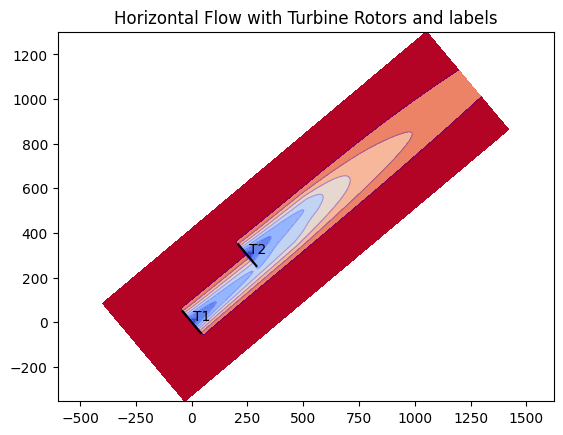

In [6]:
power = two_turbine_simulation(fmodel,
                               x_turb2 = 250, 
                               y_turb2 = 300,
                               wind_directions = [230])

### Plot
horizontal_plane = fmodel.calculate_horizontal_plane(
    x_resolution=200,
    y_resolution=100,
    height=90.0,
)

turbine_names = ["T1", "T2"]

fig, ax = plt.subplots()
visualize_cut_plane(
    horizontal_plane,
    ax=ax,
    label_contours=False,
    title="Horizontal Flow with Turbine Rotors and labels",
)

# Plot the turbine rotors
layoutviz.plot_turbine_rotors(fmodel, ax=ax)
layoutviz.plot_turbine_labels(fmodel, ax=ax, turbine_names=turbine_names)

plt.show()

### Data with constant wind direction and wind speed

In [3]:
# Generate data using two_turbine_simulation_data_generation
data = two_turbine_simulation_data_generation(fmodel, 
                                              x_range=(0, 5000, 50), 
                                              y_range=(0, 600, 50),
                                              wind_speeds=[8.0],
                                              wind_directions=[270.0],
                                              turbulence_intensities=[0.06],
                                              dtype=float
                                              )

# Display the first few rows of the generated data
data.head()

# Save the generated data to a CSV file
data.to_csv('data/two_turbine_deterministic270.csv', index=False)

### variable wind direction

In [ ]:
# variable wind direction

import numpy as np
wind_directions = np.arange(0, 360, 10)
wind_speeds = [8.0] * len(wind_directions)
turbulence_intensities = [0.06] * len(wind_directions)

#print(np.array([wind_directions, wind_speeds, turbulence_intensities]).T)


In [17]:

# Generate data using two_turbine_simulation_data_generation
data = two_turbine_simulation_data_generation(fmodel, 
                                              x_range=(0, 5000+1, 50), 
                                              y_range=(0, 600+1, 50),
                                              wind_speeds=wind_speeds,
                                              wind_directions=wind_directions,
                                              turbulence_intensities=turbulence_intensities,
                                              dtype=float
                                              )

# Display the first few rows of the generated data
data.head()

data.to_csv('data/two_turbine_simulation_data_var_wind_dir.csv', index=False)


In [18]:
data

,x_turb2,y_turb2,wind_speed,wind_direction,turbulence_intensity,turbine1_power,turbine2_powers,farm_power
0,0.0,0.0,8.0,0.0,0.06,1753.954459,1753.954459,3507.908918
1,0.0,0.0,8.0,10.0,0.06,1753.954459,1753.954459,3507.908918
2,0.0,0.0,8.0,20.0,0.06,1753.954459,1753.954459,3507.908918
3,0.0,0.0,8.0,30.0,0.06,1753.954459,1753.954459,3507.908918
4,0.0,0.0,8.0,40.0,0.06,1753.954459,1753.954459,3507.908918
...,...,...,...,...,...,...,...,...
47263,5000.0,600.0,8.0,310.0,0.06,1753.954459,1753.954459,3507.908918
47264,5000.0,600.0,8.0,320.0,0.06,1753.954459,1753.954459,3507.908918
47265,5000.0,600.0,8.0,330.0,0.06,1753.954459,1753.954459,3507.908918
47266,5000.0,600.0,8.0,340.0,0.06,1753.954459,1753.954459,3507.908918
